In [61]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\housing_prices.csv")

In [65]:
data.head()

,ID,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,...,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,2,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,3,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,4,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,5,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [66]:
data.columns

Index(['ID', 'Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_living',
       'Sqft_lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
       'Sqft_above', 'Sqft_basement', 'Yr_built', 'Yr_renovated', 'zipcode',
       'Lat', 'Long', 'Sqft_living15', 'Sqft_lot15'],
      dtype='object')

In [67]:
data = data[['Price', 'Bedrooms', 'Bathrooms', 'Sqft_living',
       'Sqft_lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
       'Sqft_above', 'Sqft_basement','Sqft_living15', 'Sqft_lot15']]

In [68]:
data.columns #= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','variety']

Index(['Price', 'Bedrooms', 'Bathrooms', 'Sqft_living', 'Sqft_lot', 'Floors',
       'Waterfront', 'View', 'Condition', 'Grade', 'Sqft_above',
       'Sqft_basement', 'Sqft_living15', 'Sqft_lot15'],
      dtype='object')

In [69]:
data.isnull().sum().sum()

0

In [70]:
data

,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Sqft_living15,Sqft_lot15
0,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,2060,7316
1,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,2060,7316
2,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,2590,21891
3,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,2250,20023
4,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1290,10320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1190,4168
21609,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1930,5150
21610,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1510,4538
21611,399900.0,2,1.75,1410,1005,1.5,0,0,3,9,900,510,1440,1188


In [71]:
#data['variety'] = np.where(data['variety']=='Setosa',0,np.where(data['variety']=='Versicolor',1,np.where(data['variety']=='Virginica',2,None)))

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          21613 non-null  float64
 1   Bedrooms       21613 non-null  int64  
 2   Bathrooms      21613 non-null  float64
 3   Sqft_living    21613 non-null  int64  
 4   Sqft_lot       21613 non-null  int64  
 5   Floors         21613 non-null  float64
 6   Waterfront     21613 non-null  int64  
 7   View           21613 non-null  int64  
 8   Condition      21613 non-null  int64  
 9   Grade          21613 non-null  int64  
 10  Sqft_above     21613 non-null  int64  
 11  Sqft_basement  21613 non-null  int64  
 12  Sqft_living15  21613 non-null  int64  
 13  Sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [73]:
#data['variety'] = data['variety'].astype('float64')
X = data.drop('Price', axis = 1)
y = data['Price']

In [74]:
X = (data - data.mean())/data.std()

In [75]:
X

,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Sqft_living15,Sqft_lot15
0,-0.708244,2.826864,1.149422,0.348526,-0.138433,0.936484,-0.087171,-0.305752,-0.629172,-0.558823,0.738577,-0.658666,0.107161,-0.199693
1,-0.653802,2.826864,1.149422,0.348526,-0.138433,0.936484,-0.087171,-0.305752,-0.629172,-0.558823,0.738577,-0.658666,0.107161,-0.199693
2,0.292131,0.676469,-0.473610,-0.021667,0.263856,-0.915406,-0.087171,-0.305752,0.907533,0.291909,-0.758843,1.374888,0.880442,0.334108
3,-0.381591,-0.398728,-1.447430,-0.674948,0.673411,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,-0.396564,-0.658666,0.384375,0.265694
4,-0.830739,-0.398728,-1.447430,-0.707612,-0.181262,0.010539,-0.087171,-0.305752,0.907533,-1.409554,-0.939982,0.290326,-1.016284,-0.089673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.476865,1.751667,-0.149004,-0.522516,-0.264095,0.010539,-0.087171,-0.305752,-0.629172,-0.558823,-0.227500,-0.658666,-1.162186,-0.314987
21609,-0.436033,-1.473925,-1.447430,-1.132245,-0.186742,-0.915406,-0.087171,-0.305752,2.444237,-0.558823,-1.145274,-0.206765,-0.082511,-0.279022
21610,-0.547640,-0.398728,-1.447430,-1.066916,-0.265061,-0.915406,-0.087171,-0.305752,0.907533,-0.558823,-1.290185,0.199946,-0.695300,-0.301436
21611,-0.381863,-1.473925,-0.473610,-0.729388,-0.340459,0.010539,-0.087171,-0.305752,-0.629172,1.142641,-1.072818,0.493681,-0.797431,-0.424128


In [76]:
train_x,test_x,train_y,test_y = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [77]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(17290, 14) (4323, 14) (17290,) (4323,)


In [78]:
x_train_tensor = torch.tensor(train_x.values, dtype = torch.float32)
y_train_tensor = torch.tensor(train_y, dtype = torch.float32)
x_test_tensor = torch.tensor(np.array(test_x.values), dtype = torch.float32)
y_test_tensor = torch.tensor(np.array(test_y), dtype = torch.float32)

In [79]:
tensor_dataset = TensorDataset(x_train_tensor,y_train_tensor)

In [80]:
dataloader = DataLoader(tensor_dataset, batch_size = 16, shuffle = False)

In [81]:
dataloader

In [82]:
tensor_dataset

In [83]:
# Defining the NN Architecture

class FFNNRegression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNNRegression, self).__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden_size), # adding one hidden layer only
        nn.ReLU(),
        nn.Linear(hidden_size, output_size))
            
    def forward(self, x):
        return self.layers(x)
            

In [84]:
input_size = train_x.shape[1]
hidden_size = 16
output_size = 1
# defining optimizers

model = FFNNRegression(input_size, hidden_size, output_size)

#loss_calc = nn.CrossEntropyLoss()
loss_calc = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [85]:
model

FFNNRegression(
  (layers): Sequential(
    (0): Linear(in_features=14, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [86]:
# Training loop

num_epochs = 20

epochs_loss = []
for num_epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        outputs = model(batch_x)
        loss = loss_calc(outputs.view(-1, 1).float().squeeze(), batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epochs:[{num_epoch+1}/{num_epochs}],  Loss:{loss.item()}')
    epochs_loss.append(loss.item())

Epochs:[1/20],  Loss:313709690880.0
Epochs:[2/20],  Loss:289123663872.0
Epochs:[3/20],  Loss:256442466304.0
Epochs:[4/20],  Loss:220133720064.0
Epochs:[5/20],  Loss:183445962752.0
Epochs:[6/20],  Loss:148813053952.0
Epochs:[7/20],  Loss:117870714880.0
Epochs:[8/20],  Loss:91418525696.0
Epochs:[9/20],  Loss:69783887872.0
Epochs:[10/20],  Loss:53129256960.0
Epochs:[11/20],  Loss:41208127488.0
Epochs:[12/20],  Loss:33196707840.0
Epochs:[13/20],  Loss:27967172608.0
Epochs:[14/20],  Loss:24483786752.0
Epochs:[15/20],  Loss:22067445760.0
Epochs:[16/20],  Loss:20482492416.0
Epochs:[17/20],  Loss:19324770304.0
Epochs:[18/20],  Loss:16854963200.0
Epochs:[19/20],  Loss:14603827200.0
Epochs:[20/20],  Loss:12939184128.0


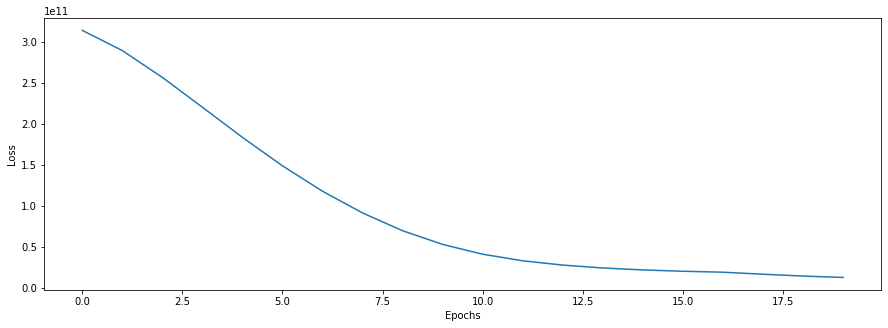

In [92]:
plt.figure(figsize = (15,5))
plt.plot([i for i in range(num_epochs)], epochs_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [93]:
# prediction

with torch.no_grad():
    pred_outputs = model(x_test_tensor)
    #_,predicted_y = torch.max(pred_outputs, 1)

In [94]:
r2_score(y_test_tensor.tolist(), [item[0] for item in pred_outputs.tolist()])

0.7230259482789005

In [95]:
np.sqrt(mean_squared_error(y_test_tensor.tolist(), [item[0] for item in pred_outputs.tolist()]))

182044.47450696293

In [96]:
np.mean(y_test_tensor.tolist())

540059.6245662734

In [98]:
182044/540059

0.33708168922284415